# Logistic Regression

In Logistic Regression the output will be a binary value(0 or 1).we take titatinic dataset from kaggle and predict whether people will survive or not(0 or 1) using LogisticRegression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('titanic_train.csv')

head() function returns the first five rows ,so we can get an idea about our data

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# handling the missing values

In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

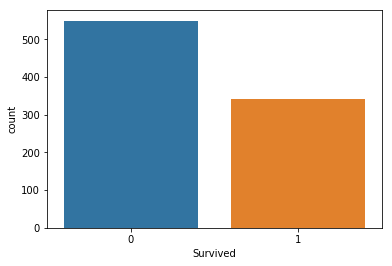

In [71]:
sns.countplot(x='Survived',data=data)

now we know there are more people who died than people who survived

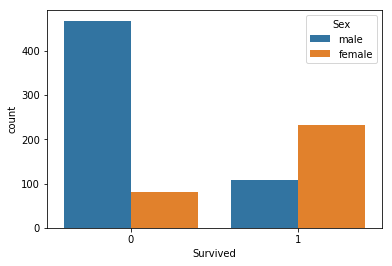

In [73]:
sns.countplot(x='Survived',hue='Sex',data=data)

Females have higher survival rates than the males

In [27]:
del data['Cabin']

In [29]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [31]:
data.dropna(inplace=True)

i droped all the missing values .you can either drop them or fill them

In [32]:
data.size

7832

In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Drop the columns which will not be useful for the predictions

In [35]:
del data['Ticket']

In [38]:
del data['Name']

In [41]:
del data['Embarked']

# Converting categorical values

In [42]:
Sex = pd.get_dummies(data['Sex'],drop_first=True)

In [43]:
data.drop(['Sex'],axis=1,inplace=True)

In [44]:
data = pd.concat([data,Sex],axis=1)

In [45]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [51]:
Y=data.iloc[:,1]

In [53]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [54]:
del data['Survived']

In [57]:
X=data.iloc[:,:7]

In [58]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male
0,1,3,22.0,1,0,7.2500,1
1,2,1,38.0,1,0,71.2833,0
2,3,3,26.0,0,0,7.9250,0
3,4,1,35.0,1,0,53.1000,0
4,5,3,35.0,0,0,8.0500,1


In [59]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [61]:
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=89)

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
r=LogisticRegression().fit(X_train,Y_train)

In [64]:
pred=r.predict(X_test)

In [65]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(Y_test,pred))

             precision    recall  f1-score   support

          0       0.79      0.89      0.84       131
          1       0.78      0.64      0.70        83

avg / total       0.79      0.79      0.78       214

